In [27]:
import matplotlib #we'll only use this to determine the matplotlib version number
import matplotlib.pyplot as plt  # the graphing library
import numpy as np # scientific computing library
import pandas as pd # the data structure and analysis library
from pandas import DataFrame, read_csv, Series # specific functions from pandas
import seaborn as sns # Makes graphs look pretty
import sys #we'll only use this to determine the python version number
import scipy.stats

# Section: Correlation

In [49]:
data = pd.read_csv("modified_dataset.csv")

In [50]:
data

,Q1A,Q1I,Q2A,Q2I,Q3A,Q3I,Q4A,Q4I,Q5A,Q5I,...,voted,married,familysize,major,depression_scores,anxiety_scores,stress_scores,depression_status,anxiety_status,stress_status
0,4,28,4,25,2,16,4,8,4,34,...,2,1,2,Unknown,41,48,54,Extremely Severe,Extremely Severe,Extremely Severe
1,4,2,1,36,2,35,3,28,4,10,...,2,1,4,Unknown,38,31,41,Extremely Severe,Extremely Severe,Extremely Severe
2,3,7,1,33,4,41,1,13,4,11,...,1,1,3,Unknown,53,26,31,Extremely Severe,Severe,Extremely Severe
3,2,23,3,11,2,37,1,27,3,28,...,2,1,5,biology,30,31,30,Extremely Severe,Extremely Severe,Extremely Severe
4,2,36,2,13,3,5,4,10,4,2,...,2,1,4,Psychology,46,54,43,Extremely Severe,Extremely Severe,Extremely Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,1,5,3,29,2,37,3,39,...,2,1,2,Unknown,50,26,29,Extremely Severe,Severe,Extremely Severe
39771,3,14,4,41,3,15,4,33,3,17,...,2,1,4,Mathematic,52,48,48,Extremely Severe,Extremely Severe,Extremely Severe
39772,2,1,1,4,2,14,1,27,1,6,...,1,2,3,Computer Science,18,15,19,Moderate,Moderate,Moderate
39773,3,36,1,34,2,10,2,20,3,9,...,1,1,2,History,30,27,47,Extremely Severe,Severe,Extremely Severe


In [51]:
#Reduced dataset to DAS scores and status
df = data[['depression_scores','anxiety_scores','stress_scores','depression_status','anxiety_status','stress_status']]
df

,depression_scores,anxiety_scores,stress_scores,depression_status,anxiety_status,stress_status
0,41,48,54,Extremely Severe,Extremely Severe,Extremely Severe
1,38,31,41,Extremely Severe,Extremely Severe,Extremely Severe
2,53,26,31,Extremely Severe,Severe,Extremely Severe
3,30,31,30,Extremely Severe,Extremely Severe,Extremely Severe
4,46,54,43,Extremely Severe,Extremely Severe,Extremely Severe
...,...,...,...,...,...,...
39770,50,26,29,Extremely Severe,Severe,Extremely Severe
39771,52,48,48,Extremely Severe,Extremely Severe,Extremely Severe
39772,18,15,19,Moderate,Moderate,Moderate
39773,30,27,47,Extremely Severe,Severe,Extremely Severe


# Correlation using Spearman's Rank Correlation

In [57]:
#correlation matrix with Spearman's rank correlation coefficient between two ordinal data using pandas
matrix = df.corr(
    method = 'spearman',
    min_periods = 1
)

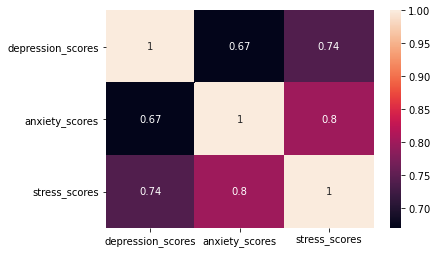

Observations:
- There are strong correlations between all variables - Depression, Anxiety, and Stress
- Stress and Anxiety displaying strongest positive correlation


In [58]:
#Summary for Linear Regression

#Generating Heatmap between depression, anxiety and stress scores
matrix = df.corr().round(2)
sns.heatmap(matrix,annot=True)
plt.show()


print ('Observations:')
print ('- There are strong correlations between all variables - Depression, Anxiety, and Stress')
print ('- Stress and Anxiety displaying strongest positive correlation')


In [59]:
#Data with all 42 questions and Depression score


df_depression = data[['depression_scores','Q1A','Q2A','Q3A','Q4A','Q5A','Q6A','Q7A','Q8A','Q9A','Q10A','Q11A','Q12A','Q13A','Q14A','Q15A','Q16A','Q17A','Q18A','Q19A','Q20A','Q21A','Q22A','Q23A','Q24A','Q25A','Q26A','Q27A','Q28A','Q29A','Q30A','Q31A','Q32A','Q33A','Q34A','Q35A','Q36A','Q37A','Q38A','Q39A','Q40A','Q41A']]
df_depression


,depression_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,...,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
0,41,4,4,2,4,4,4,4,4,2,...,4,2,3,4,4,1,2,4,3,4
1,38,4,1,2,3,4,4,3,4,3,...,3,3,2,2,3,4,2,2,1,2
2,53,3,1,4,1,4,3,1,3,2,...,3,1,4,3,4,4,4,2,2,1
3,30,2,3,2,1,3,3,4,2,3,...,1,2,4,1,1,2,1,3,4,4
4,46,2,2,3,4,4,2,4,4,4,...,4,4,4,3,4,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,50,2,1,3,2,3,2,1,3,1,...,1,2,4,1,2,4,4,2,3,1
39771,52,3,4,3,4,3,4,4,4,3,...,3,3,4,3,3,3,4,3,3,3
39772,18,2,1,2,1,1,1,1,1,2,...,1,2,1,1,1,1,1,2,1,1
39773,30,3,1,2,2,3,3,3,4,3,...,3,4,2,3,2,1,2,3,2,4


In [60]:
#Correlation Matrix for Depression_scores against 42 Questions
depression_matrix = df_depression.corr(
    method = 'spearman',
    min_periods = 1
)

#.style.background_gradient() adds gradient style for easier correlation understanding
depression_matrix.style.background_gradient()   

,depression_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
depression_scores,1.000000,0.588393,0.348604,0.795485,0.442266,0.766695,0.488454,0.437265,0.582315,0.494752,0.832233,0.604951,0.515265,0.817989,0.383098,0.455858,0.804310,0.815207,0.452208,0.353595,0.551530,0.847682,0.577275,0.404433,0.781830,0.410297,0.784194,0.580540,0.518973,0.566905,0.527061,0.771088,0.502369,0.538245,0.825260,0.509586,0.581373,0.807509,0.840579,0.567245,0.503279,0.413495
Q1A,0.588393,1.000000,0.310075,0.475631,0.383639,0.464331,0.560454,0.386351,0.477137,0.471540,0.450097,0.674480,0.467362,0.543846,0.437925,0.364540,0.464860,0.495106,0.486322,0.315471,0.489664,0.476676,0.490858,0.332709,0.462497,0.360411,0.508327,0.577269,0.463749,0.581257,0.484355,0.437868,0.488755,0.469924,0.501378,0.481646,0.498813,0.435316,0.465102,0.529499,0.477736,0.358216
Q2A,0.348604,0.310075,1.000000,0.275811,0.365205,0.278047,0.276610,0.372429,0.300279,0.323303,0.265712,0.307862,0.321511,0.297728,0.284228,0.339556,0.290296,0.288434,0.271073,0.331801,0.336977,0.281181,0.301880,0.377925,0.282430,0.351324,0.293071,0.293178,0.327649,0.312744,0.320125,0.279970,0.300398,0.316138,0.290992,0.299118,0.345618,0.260507,0.270199,0.287955,0.322985,0.352690
Q3A,0.795485,0.475631,0.275811,1.000000,0.358457,0.583997,0.400259,0.347689,0.495529,0.385975,0.636444,0.486180,0.418338,0.633331,0.307064,0.367414,0.630535,0.589595,0.355144,0.281280,0.440993,0.631000,0.483685,0.334515,0.646846,0.327589,0.602531,0.464756,0.417024,0.470893,0.403278,0.637377,0.406335,0.440577,0.598682,0.419508,0.462639,0.616581,0.625921,0.457961,0.383345,0.325183
Q4A,0.442266,0.383639,0.365205,0.358457,1.000000,0.357877,0.366995,0.538597,0.430870,0.426266,0.338781,0.384293,0.464982,0.395946,0.314537,0.492683,0.347529,0.363382,0.312922,0.419229,0.463119,0.368766,0.414329,0.471398,0.349521,0.557157,0.375988,0.370649,0.524896,0.416308,0.377243,0.337268,0.353987,0.477666,0.361372,0.351687,0.456456,0.327538,0.356336,0.400120,0.419478,0.511162
Q5A,0.766695,0.464331,0.278047,0.583997,0.357877,1.000000,0.393891,0.361426,0.497126,0.397400,0.593257,0.469370,0.440161,0.605082,0.312423,0.375206,0.596371,0.561103,0.361176,0.289561,0.438219,0.582737,0.504520,0.324473,0.592858,0.336571,0.591815,0.471845,0.430119,0.451419,0.426157,0.589438,0.421990,0.463768,0.569556,0.424202,0.443586,0.559489,0.570531,0.485272,0.394981,0.337404
Q6A,0.488454,0.560454,0.276610,0.400259,0.366995,0.393891,1.000000,0.369720,0.467009,0.446237,0.368390,0.570791,0.462797,0.444179,0.419940,0.337954,0.369880,0.421463,0.446804,0.309320,0.453423,0.398398,0.461871,0.310788,0.377261,0.340414,0.422157,0.533558,0.474557,0.544977,0.421386,0.353742,0.449989,0.457852,0.423269,0.448279,0.450544,0.357973,0.382317,0.491823,0.463443,0.346651
Q7A,0.437265,0.386351,0.372429,0.347689,0.538597,0.361426,0.369720,1.000000,0.426966,0.434924,0.334112,0.379238,0.481091,0.389760,0.323548,0.502754,0.344088,0.361581,0.315471,0.456243,0.470024,0.360752,0.408118,0.457721,0.338465,0.486898,0.374176,0.370898,0.522774,0.415909,0.402277,0.334340,0.355181,0.485202,0.366603,0.354133,0.463705,0.324279,0.347227,0.402513,0.436773,0.649578
Q8A,0.582315,0.477137,0.300279,0.495529,0.430870,0.497126,0.467009,0.426966,1.000000,0.461005,0.446007,0.485820,0.554014,0.523614,0.375906,0.404884,0.457954,0.445657,0.378664,0.338482,0.489843,0.457227,0.607745,0.366746,0.490127,0.409120,0.495545,0.479947,0.536992,0.541452,0.426084,0.462473,0.442490,0.579074,0.450478,0.435271,0.485125,0.425421,0.446301,0.521000,0.441597,0.397954
Q9A,0.494752,0.471540,0.323303,0.385975,0.426266,0.397400,0.446237,0.434924,0.461005,1.000000,0.380969,0.468460,0.544427,0.444327,0.374420,0.365285,0.387234,0.427215,0.364685,0.375047,0.527263,0.389381,0.439225,0.339074,0.386997,0.416542,0.423123,0.434958,0.553507,0.486585,0.506374,0.374470,0.418442,0.547969,0.431065,0.408125,0.528

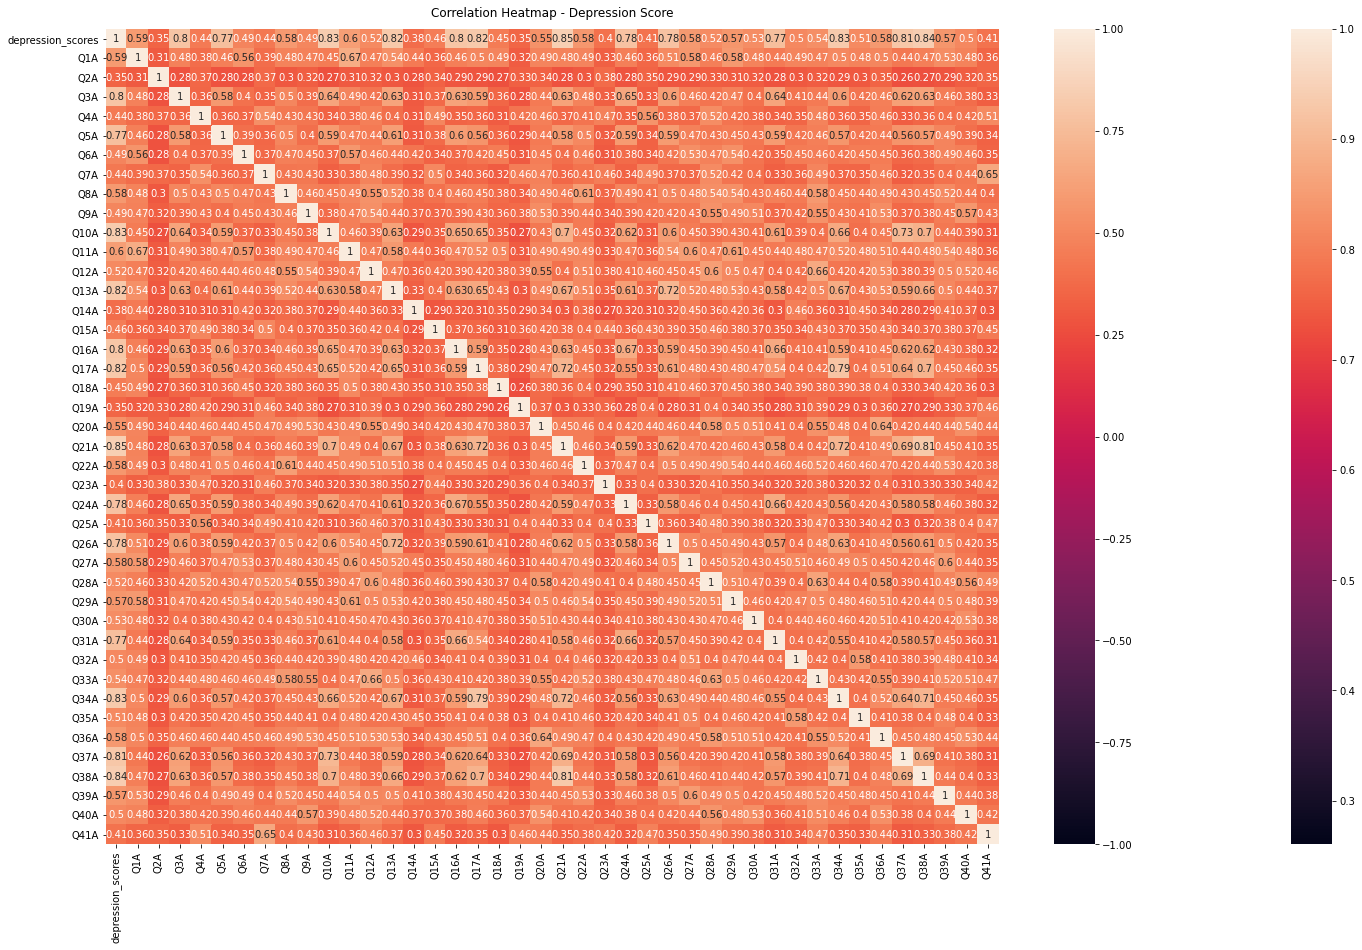

In [61]:
#Heatmap - All Variables against Depression Score

plt.figure(figsize=(25,15))
sns.heatmap(depression_matrix)
depression_heatmap = sns.heatmap(depression_matrix, vmin=-1,vmax=1, annot=True)

#title for heatmap
depression_heatmap.set_title('Correlation Heatmap - Depression Score', fontdict={'fontsize':12}, pad=12); 

In [62]:
#Format dataset to for Anxiety_scores against 42 Questions

df_anxiety = data[['anxiety_scores','Q1A','Q2A','Q3A','Q4A','Q5A','Q6A','Q7A','Q8A','Q9A','Q10A','Q11A','Q12A','Q13A','Q14A','Q15A','Q16A','Q17A','Q18A','Q19A','Q20A','Q21A','Q22A','Q23A','Q24A','Q25A','Q26A','Q27A','Q28A','Q29A','Q30A','Q31A','Q32A','Q33A','Q34A','Q35A','Q36A','Q37A','Q38A','Q39A','Q40A','Q41A']]
df_anxiety



,anxiety_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,...,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
0,48,4,4,2,4,4,4,4,4,2,...,4,2,3,4,4,1,2,4,3,4
1,31,4,1,2,3,4,4,3,4,3,...,3,3,2,2,3,4,2,2,1,2
2,26,3,1,4,1,4,3,1,3,2,...,3,1,4,3,4,4,4,2,2,1
3,31,2,3,2,1,3,3,4,2,3,...,1,2,4,1,1,2,1,3,4,4
4,54,2,2,3,4,4,2,4,4,4,...,4,4,4,3,4,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,26,2,1,3,2,3,2,1,3,1,...,1,2,4,1,2,4,4,2,3,1
39771,48,3,4,3,4,3,4,4,4,3,...,3,3,4,3,3,3,4,3,3,3
39772,15,2,1,2,1,1,1,1,1,2,...,1,2,1,1,1,1,1,2,1,1
39773,27,3,1,2,2,3,3,3,4,3,...,3,4,2,3,2,1,2,3,2,4


In [63]:
#Correlation Matrix for Anxiety_scores against 42 Questions
anxiety_matrix = df_anxiety.corr(
    method = 'spearman',
    min_periods = 1
)

#.style.background_gradient() adds gradient style for easier correlation understanding
anxiety_matrix.style.background_gradient()   

,anxiety_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
anxiety_scores,1.000000,0.596110,0.559509,0.528057,0.709909,0.538547,0.559815,0.727023,0.613758,0.718622,0.516964,0.596305,0.687731,0.597368,0.469219,0.640158,0.526130,0.570990,0.481724,0.609800,0.747737,0.551932,0.589372,0.596268,0.519929,0.679485,0.566469,0.558877,0.764132,0.621183,0.675090,0.505357,0.532000,0.692620,0.575123,0.524793,0.743744,0.506807,0.532867,0.579114,0.724137,0.700956
Q1A,0.596110,1.000000,0.310075,0.475631,0.383639,0.464331,0.560454,0.386351,0.477137,0.471540,0.450097,0.674480,0.467362,0.543846,0.437925,0.364540,0.464860,0.495106,0.486322,0.315471,0.489664,0.476676,0.490858,0.332709,0.462497,0.360411,0.508327,0.577269,0.463749,0.581257,0.484355,0.437868,0.488755,0.469924,0.501378,0.481646,0.498813,0.435316,0.465102,0.529499,0.477736,0.358216
Q2A,0.559509,0.310075,1.000000,0.275811,0.365205,0.278047,0.276610,0.372429,0.300279,0.323303,0.265712,0.307862,0.321511,0.297728,0.284228,0.339556,0.290296,0.288434,0.271073,0.331801,0.336977,0.281181,0.301880,0.377925,0.282430,0.351324,0.293071,0.293178,0.327649,0.312744,0.320125,0.279970,0.300398,0.316138,0.290992,0.299118,0.345618,0.260507,0.270199,0.287955,0.322985,0.352690
Q3A,0.528057,0.475631,0.275811,1.000000,0.358457,0.583997,0.400259,0.347689,0.495529,0.385975,0.636444,0.486180,0.418338,0.633331,0.307064,0.367414,0.630535,0.589595,0.355144,0.281280,0.440993,0.631000,0.483685,0.334515,0.646846,0.327589,0.602531,0.464756,0.417024,0.470893,0.403278,0.637377,0.406335,0.440577,0.598682,0.419508,0.462639,0.616581,0.625921,0.457961,0.383345,0.325183
Q4A,0.709909,0.383639,0.365205,0.358457,1.000000,0.357877,0.366995,0.538597,0.430870,0.426266,0.338781,0.384293,0.464982,0.395946,0.314537,0.492683,0.347529,0.363382,0.312922,0.419229,0.463119,0.368766,0.414329,0.471398,0.349521,0.557157,0.375988,0.370649,0.524896,0.416308,0.377243,0.337268,0.353987,0.477666,0.361372,0.351687,0.456456,0.327538,0.356336,0.400120,0.419478,0.511162
Q5A,0.538547,0.464331,0.278047,0.583997,0.357877,1.000000,0.393891,0.361426,0.497126,0.397400,0.593257,0.469370,0.440161,0.605082,0.312423,0.375206,0.596371,0.561103,0.361176,0.289561,0.438219,0.582737,0.504520,0.324473,0.592858,0.336571,0.591815,0.471845,0.430119,0.451419,0.426157,0.589438,0.421990,0.463768,0.569556,0.424202,0.443586,0.559489,0.570531,0.485272,0.394981,0.337404
Q6A,0.559815,0.560454,0.276610,0.400259,0.366995,0.393891,1.000000,0.369720,0.467009,0.446237,0.368390,0.570791,0.462797,0.444179,0.419940,0.337954,0.369880,0.421463,0.446804,0.309320,0.453423,0.398398,0.461871,0.310788,0.377261,0.340414,0.422157,0.533558,0.474557,0.544977,0.421386,0.353742,0.449989,0.457852,0.423269,0.448279,0.450544,0.357973,0.382317,0.491823,0.463443,0.346651
Q7A,0.727023,0.386351,0.372429,0.347689,0.538597,0.361426,0.369720,1.000000,0.426966,0.434924,0.334112,0.379238,0.481091,0.389760,0.323548,0.502754,0.344088,0.361581,0.315471,0.456243,0.470024,0.360752,0.408118,0.457721,0.338465,0.486898,0.374176,0.370898,0.522774,0.415909,0.402277,0.334340,0.355181,0.485202,0.366603,0.354133,0.463705,0.324279,0.347227,0.402513,0.436773,0.649578
Q8A,0.613758,0.477137,0.300279,0.495529,0.430870,0.497126,0.467009,0.426966,1.000000,0.461005,0.446007,0.485820,0.554014,0.523614,0.375906,0.404884,0.457954,0.445657,0.378664,0.338482,0.489843,0.457227,0.607745,0.366746,0.490127,0.409120,0.495545,0.479947,0.536992,0.541452,0.426084,0.462473,0.442490,0.579074,0.450478,0.435271,0.485125,0.425421,0.446301,0.521000,0.441597,0.397954
Q9A,0.718622,0.471540,0.323303,0.385975,0.426266,0.397400,0.446237,0.434924,0.461005,1.000000,0.380969,0.468460,0.544427,0.444327,0.374420,0.365285,0.387234,0.427215,0.364685,0.375047,0.527263,0.389381,0.439225,0.339074,0.386997,0.416542,0.423123,0.434958,0.553507,0.486585,0.506374,0.374470,0.418442,0.547969,0.431065,0.408125,0.528180,0.

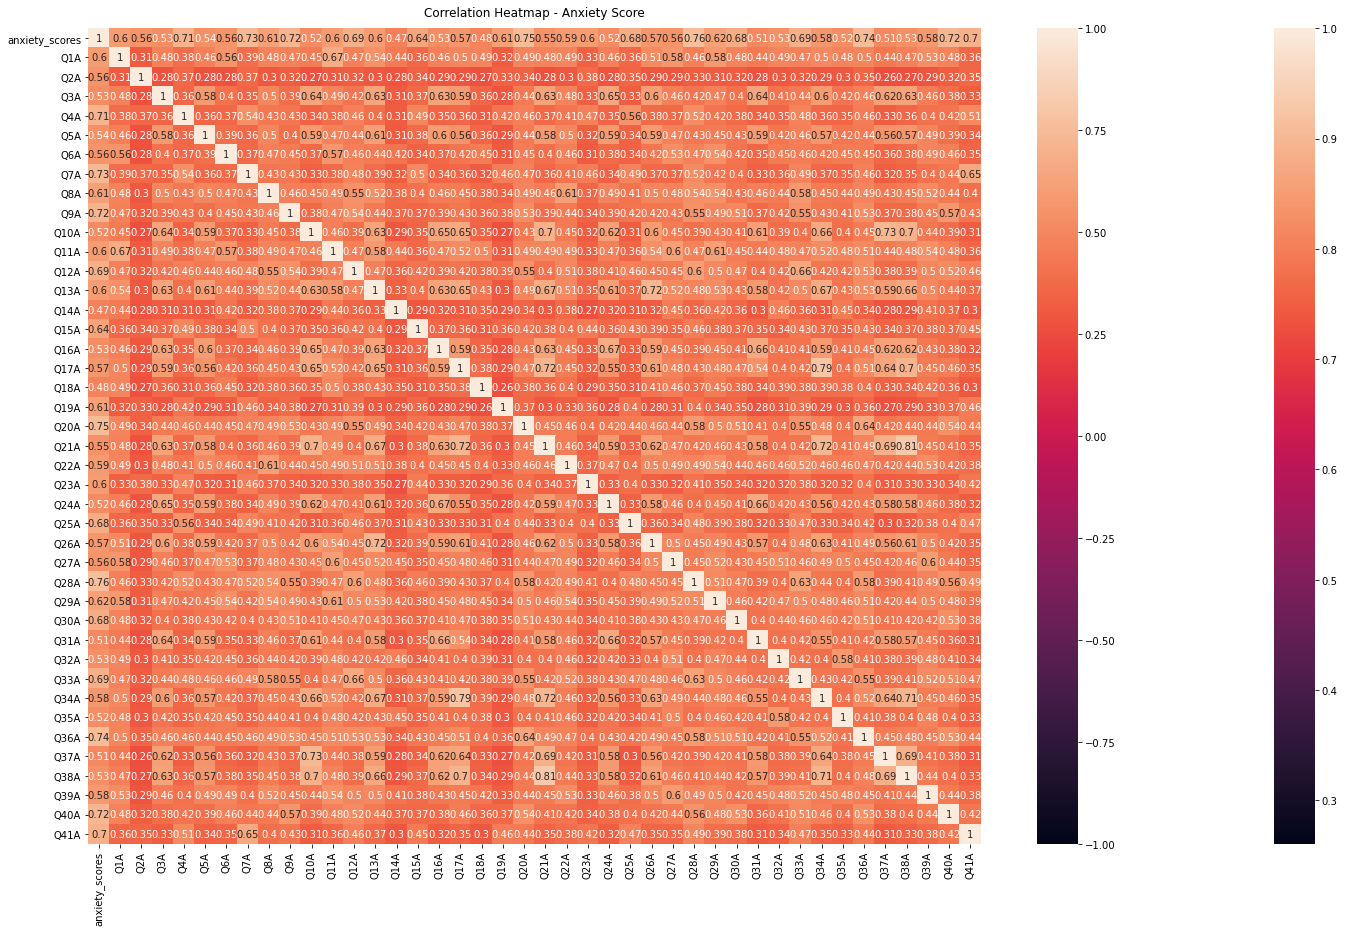

In [67]:
#Heatmap - All Variables against Anxiety Score

plt.figure(figsize=(25,15))
sns.heatmap(anxiety_matrix)
anxiety_heatmap = sns.heatmap(anxiety_matrix, vmin=-1,vmax=1, annot=True)

#title for heatmap
anxiety_heatmap.set_title('Correlation Heatmap - Anxiety Score', fontdict={'fontsize':12}, pad=12); 

In [68]:
#Format dataset to for Stress_scores against 42 Questions

df_stress = data[['stress_scores','Q1A','Q2A','Q3A','Q4A','Q5A','Q6A','Q7A','Q8A','Q9A','Q10A','Q11A','Q12A','Q13A','Q14A','Q15A','Q16A','Q17A','Q18A','Q19A','Q20A','Q21A','Q22A','Q23A','Q24A','Q25A','Q26A','Q27A','Q28A','Q29A','Q30A','Q31A','Q32A','Q33A','Q34A','Q35A','Q36A','Q37A','Q38A','Q39A','Q40A','Q41A']]
df_stress


,stress_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,...,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
0,54,4,4,2,4,4,4,4,4,2,...,4,2,3,4,4,1,2,4,3,4
1,41,4,1,2,3,4,4,3,4,3,...,3,3,2,2,3,4,2,2,1,2
2,31,3,1,4,1,4,3,1,3,2,...,3,1,4,3,4,4,4,2,2,1
3,30,2,3,2,1,3,3,4,2,3,...,1,2,4,1,1,2,1,3,4,4
4,43,2,2,3,4,4,2,4,4,4,...,4,4,4,3,4,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,29,2,1,3,2,3,2,1,3,1,...,1,2,4,1,2,4,4,2,3,1
39771,48,3,4,3,4,3,4,4,4,3,...,3,3,4,3,3,3,4,3,3,3
39772,19,2,1,2,1,1,1,1,1,2,...,1,2,1,1,1,1,1,2,1,1
39773,47,3,1,2,2,3,3,3,4,3,...,3,4,2,3,2,1,2,3,2,4


In [69]:
#Correlation Matrix for Anxiety_scores against 42 Questions
stress_matrix = df_stress.corr(
    method = 'spearman',
    min_periods = 1
)

#.style.background_gradient() adds gradient style for easier correlation understanding
stress_matrix.style.background_gradient()   

,stress_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
stress_scores,1.000000,0.766133,0.412058,0.600574,0.537976,0.608613,0.724839,0.540558,0.727056,0.624978,0.564480,0.779083,0.707405,0.667483,0.623497,0.504019,0.577792,0.601246,0.634731,0.445187,0.632703,0.589509,0.724250,0.458842,0.589108,0.511944,0.636157,0.758749,0.658712,0.760422,0.598984,0.565602,0.695762,0.714165,0.606326,0.685787,0.640594,0.542542,0.571537,0.742685,0.616095,0.509491
Q1A,0.766133,1.000000,0.310075,0.475631,0.383639,0.464331,0.560454,0.386351,0.477137,0.471540,0.450097,0.674480,0.467362,0.543846,0.437925,0.364540,0.464860,0.495106,0.486322,0.315471,0.489664,0.476676,0.490858,0.332709,0.462497,0.360411,0.508327,0.577269,0.463749,0.581257,0.484355,0.437868,0.488755,0.469924,0.501378,0.481646,0.498813,0.435316,0.465102,0.529499,0.477736,0.358216
Q2A,0.412058,0.310075,1.000000,0.275811,0.365205,0.278047,0.276610,0.372429,0.300279,0.323303,0.265712,0.307862,0.321511,0.297728,0.284228,0.339556,0.290296,0.288434,0.271073,0.331801,0.336977,0.281181,0.301880,0.377925,0.282430,0.351324,0.293071,0.293178,0.327649,0.312744,0.320125,0.279970,0.300398,0.316138,0.290992,0.299118,0.345618,0.260507,0.270199,0.287955,0.322985,0.352690
Q3A,0.600574,0.475631,0.275811,1.000000,0.358457,0.583997,0.400259,0.347689,0.495529,0.385975,0.636444,0.486180,0.418338,0.633331,0.307064,0.367414,0.630535,0.589595,0.355144,0.281280,0.440993,0.631000,0.483685,0.334515,0.646846,0.327589,0.602531,0.464756,0.417024,0.470893,0.403278,0.637377,0.406335,0.440577,0.598682,0.419508,0.462639,0.616581,0.625921,0.457961,0.383345,0.325183
Q4A,0.537976,0.383639,0.365205,0.358457,1.000000,0.357877,0.366995,0.538597,0.430870,0.426266,0.338781,0.384293,0.464982,0.395946,0.314537,0.492683,0.347529,0.363382,0.312922,0.419229,0.463119,0.368766,0.414329,0.471398,0.349521,0.557157,0.375988,0.370649,0.524896,0.416308,0.377243,0.337268,0.353987,0.477666,0.361372,0.351687,0.456456,0.327538,0.356336,0.400120,0.419478,0.511162
Q5A,0.608613,0.464331,0.278047,0.583997,0.357877,1.000000,0.393891,0.361426,0.497126,0.397400,0.593257,0.469370,0.440161,0.605082,0.312423,0.375206,0.596371,0.561103,0.361176,0.289561,0.438219,0.582737,0.504520,0.324473,0.592858,0.336571,0.591815,0.471845,0.430119,0.451419,0.426157,0.589438,0.421990,0.463768,0.569556,0.424202,0.443586,0.559489,0.570531,0.485272,0.394981,0.337404
Q6A,0.724839,0.560454,0.276610,0.400259,0.366995,0.393891,1.000000,0.369720,0.467009,0.446237,0.368390,0.570791,0.462797,0.444179,0.419940,0.337954,0.369880,0.421463,0.446804,0.309320,0.453423,0.398398,0.461871,0.310788,0.377261,0.340414,0.422157,0.533558,0.474557,0.544977,0.421386,0.353742,0.449989,0.457852,0.423269,0.448279,0.450544,0.357973,0.382317,0.491823,0.463443,0.346651
Q7A,0.540558,0.386351,0.372429,0.347689,0.538597,0.361426,0.369720,1.000000,0.426966,0.434924,0.334112,0.379238,0.481091,0.389760,0.323548,0.502754,0.344088,0.361581,0.315471,0.456243,0.470024,0.360752,0.408118,0.457721,0.338465,0.486898,0.374176,0.370898,0.522774,0.415909,0.402277,0.334340,0.355181,0.485202,0.366603,0.354133,0.463705,0.324279,0.347227,0.402513,0.436773,0.649578
Q8A,0.727056,0.477137,0.300279,0.495529,0.430870,0.497126,0.467009,0.426966,1.000000,0.461005,0.446007,0.485820,0.554014,0.523614,0.375906,0.404884,0.457954,0.445657,0.378664,0.338482,0.489843,0.457227,0.607745,0.366746,0.490127,0.409120,0.495545,0.479947,0.536992,0.541452,0.426084,0.462473,0.442490,0.579074,0.450478,0.435271,0.485125,0.425421,0.446301,0.521000,0.441597,0.397954
Q9A,0.624978,0.471540,0.323303,0.385975,0.426266,0.397400,0.446237,0.434924,0.461005,1.000000,0.380969,0.468460,0.544427,0.444327,0.374420,0.365285,0.387234,0.427215,0.364685,0.375047,0.527263,0.389381,0.439225,0.339074,0.386997,0.416542,0.423123,0.434958,0.553507,0.486585,0.506374,0.374470,0.418442,0.547969,0.431065,0.408125,0.528180,0.37

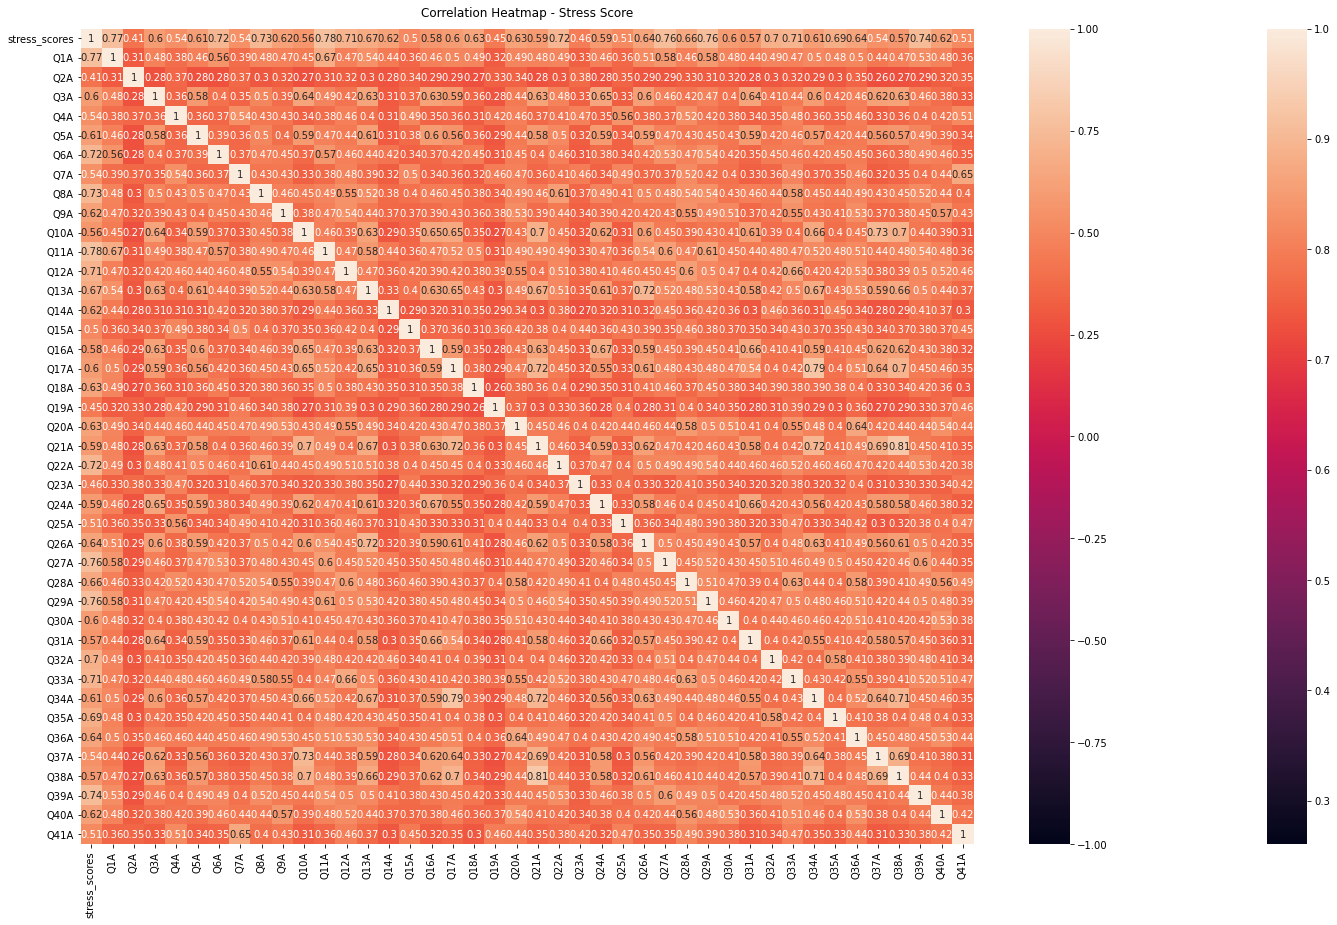

In [70]:
#Heatmap - All Variables against Stress Score

plt.figure(figsize=(25,15))
sns.heatmap(stress_matrix)
stress_heatmap = sns.heatmap(stress_matrix, vmin=-1,vmax=1, annot=True)

#title for heatmap
stress_heatmap.set_title('Correlation Heatmap - Stress Score', fontdict={'fontsize':12}, pad=12); 

# Correlation between Each Question to Depression, Anxiety & Stress Scores

In [72]:
#Extracting correlation values from the respective matrices
depression_df = depression_matrix[['depression_scores']]
anxiety_df = anxiety_matrix[['anxiety_scores']]
stress_df = stress_matrix[['stress_scores']]

#Delete first row which is irrelevant from the correlation matrix
depression_df = depression_df.iloc[1:,:]
anxiety_df = anxiety_df.iloc[1:,:]
stress_df = stress_df.iloc[1:,:]

#Add 41 questions into the data
questions = ['I found myself getting upset by quite trivial things.',' I was aware of dryness of my mouth.','I couldnt seem to experience any positive feeling at all.',' I experienced breathing difficulty eg, excessively rapid breathing, breathlessness in the absence of physical exertion','I just couldnt seem to get going.','I tended to over-react to situations.','I had a feeling of shakiness eg, legs going to give way.','I found it difficult to relax.','I found myself in situations that made me so anxious I was most relieved when they ended.','I felt that I had nothing to look forward to.','I found myself getting upset rather easily.','I felt that I was using a lot of nervous energy.','I felt sad and depressed.','I found myself getting impatient when I was delayed in any way eg, elevators, traffic lights, being kept waiting.','I had a feeling of faintness.','I felt that I had lost interest in just about everything.','I felt I wasnt worth much as a person.','I felt that I was rather touchy.','I perspired noticeably eg, hands sweaty, in the absence of high temperatures or physical exertion.','I felt scared without any good reason.','I felt that life wasnt worthwhile.','I found it hard to wind down.','I had difficulty in swallowing.','I couldnt seem to get any enjoyment out of the things I did.','I was aware of the action of my heart in the absence of physical exertion eg, sense of heart rate increase, heart missing a beat.','I felt down-hearted and blue.','I found that I was very irritable.','I felt I was close to panic.','I found it hard to calm down after something upset me.','I feared that I would be thrown by some trivial but unfamiliar task.','I was unable to become enthusiastic about anything.','I found it difficult to tolerate interruptions to what I was doing.','I was in a state of nervous tension.','I felt I was pretty worthless.','I was intolerant of anything that kept me from getting on with what I was doing.','I felt terrified.','I could see nothing in the future to be hopeful about.','I felt that life was meaningless.','I found myself getting agitated.','I was worried about situations in which I might panic and make a fool of myself.','I experienced trembling (eg, in the hands).']

#Combine the df
depression_df['Questions']=questions
depression_df['anxiety_scores']=anxiety_df
depression_df['stress_scores']=stress_df

#Rearrange column
neworder = ['Questions','depression_scores','anxiety_scores','stress_scores']

#New df with compiled scores
combined_df = depression_df.reindex(columns=neworder)

print('Correlation values for each questions on the variables depression, anxiety and stress respectively')
combined_df

Correlation values for each questions on the variables depression, anxiety and stress respectively


,Questions,depression_scores,anxiety_scores,stress_scores
Q1A,I found myself getting upset by quite trivial ...,0.588393,0.596110,0.766133
Q2A,I was aware of dryness of my mouth.,0.348604,0.559509,0.412058
Q3A,I couldnt seem to experience any positive feel...,0.795485,0.528057,0.600574
Q4A,"I experienced breathing difficulty eg, excess...",0.442266,0.709909,0.537976
Q5A,I just couldnt seem to get going.,0.766695,0.538547,0.608613
Q6A,I tended to over-react to situations.,0.488454,0.559815,0.724839
Q7A,"I had a feeling of shakiness eg, legs going to...",0.437265,0.727023,0.540558
Q8A,I found it difficult to relax.,0.582315,0.613758,0.727056
Q9A,I found myself in situations that made me so a...,0.494752,0.718622,0.624978
Q10A,I felt that I had nothing to look forward to.,0.832233,0.516964,0.564480


In [73]:
#Top 5 questions with highest correlation value for each variable Depression, Anxiety, Stress

top5_D = combined_df.sort_values(by=['depression_scores'],ascending=False)
top5_D2 = top5_D.head()


def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color


top5_D2.style.applymap(highlight_cols, subset=pd.IndexSlice[:,['depression_scores']])


,Questions,depression_scores,anxiety_scores,stress_scores
Q21A,I felt that life wasnt worthwhile.,0.847682,0.551932,0.589509
Q38A,I felt that life was meaningless.,0.840579,0.532867,0.571537
Q10A,I felt that I had nothing to look forward to.,0.832233,0.516964,0.564480
Q34A,I felt I was pretty worthless.,0.825260,0.575123,0.606326
Q13A,I felt sad and depressed.,0.817989,0.597368,0.667483


In [74]:
top5_A = combined_df.sort_values(by=['anxiety_scores'],ascending=False)
top5_A.head()

top5_A2 = top5_A.head()
def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color


top5_A2.style.applymap(highlight_cols, subset=pd.IndexSlice[:,['anxiety_scores']])

,Questions,depression_scores,anxiety_scores,stress_scores
Q28A,I felt I was close to panic.,0.518973,0.764132,0.658712
Q20A,I felt scared without any good reason.,0.551530,0.747737,0.632703
Q36A,I felt terrified.,0.581373,0.743744,0.640594
Q7A,"I had a feeling of shakiness eg, legs going to give way.",0.437265,0.727023,0.540558
Q40A,I was worried about situations in which I might panic and make a fool of myself.,0.503279,0.724137,0.616095


In [76]:
top5_S = combined_df.sort_values(by=['stress_scores'],ascending=False)
top5_S.head()

top5_S2 = top5_S.head()
def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color


top5_S2.style.applymap(highlight_cols, subset=pd.IndexSlice[:,['stress_scores']])

,Questions,depression_scores,anxiety_scores,stress_scores
Q11A,I found myself getting upset rather easily.,0.604951,0.596305,0.779083
Q1A,I found myself getting upset by quite trivial things.,0.588393,0.596110,0.766133
Q29A,I found it hard to calm down after something upset me.,0.566905,0.621183,0.760422
Q27A,I found that I was very irritable.,0.580540,0.558877,0.758749
Q39A,I found myself getting agitated.,0.567245,0.579114,0.742685
